In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [7]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [9]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [10]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)


In [11]:
# Print all of the classes mapped to the Base
mapped_classes = [cls.__name__ for cls in Base.classes]
print(mapped_classes)

['measurement', 'station']


In [12]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date).label('max_date')).scalar()
print([(most_recent_date,)])

[('2017-08-23',)]


Text(0, 0.5, 'mm')


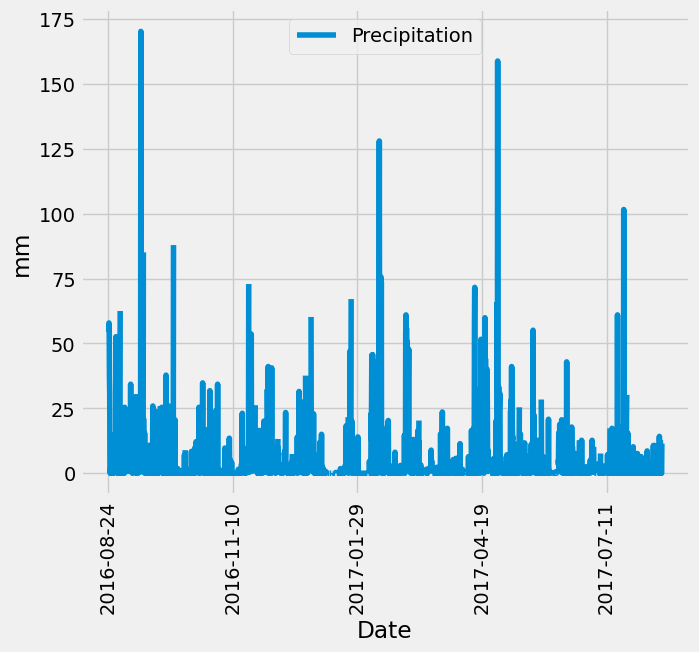

In [34]:
# print text Text(0, 0.5, 'mm')
print("Text(0, 0.5, 'mm')")

# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
most_recent_date_str = session.query(func.max(Measurement.date).label('max_date')).scalar()
most_recent_date = dt.datetime.strptime(most_recent_date_str, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp)\
                  .filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
df.sort_values(by='Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', figsize=(7, 6), legend=True, rot=45)
plt.legend(loc='upper center')
plt.xlabel('Date')
plt.ylabel('mm')
plt.xticks(rotation=90)
plt.show()

In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df['Precipitation'].describe().to_frame(name='precipitation')
summary_statistics

,precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print([(total_stations,)])

[(9,)]


In [55]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station).label('station_count'))\
                        .group_by(Measurement.station)\
                        .order_by(func.count(Measurement.station).desc())\
                        .all()

for station, count in active_stations:
    print((station), (count))

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station)\
                             .group_by(Measurement.station)\
                             .order_by(func.count(Measurement.station).desc())\
                             .first()[0]

temperature_stats = session.query(func.min(Measurement.tobs).label('min_temperature'),
                                  func.max(Measurement.tobs).label('max_temperature'),
                                  func.avg(Measurement.tobs).label('avg_temperature'))\
                           .filter(Measurement.station == most_active_station)\
                           .all()

print((most_active_station), (temperature_stats))

USC00519281 [(12.2, 29.4, 22.03582251082252)]


Text(0.5, 4.183333333333314, 'Temperature')


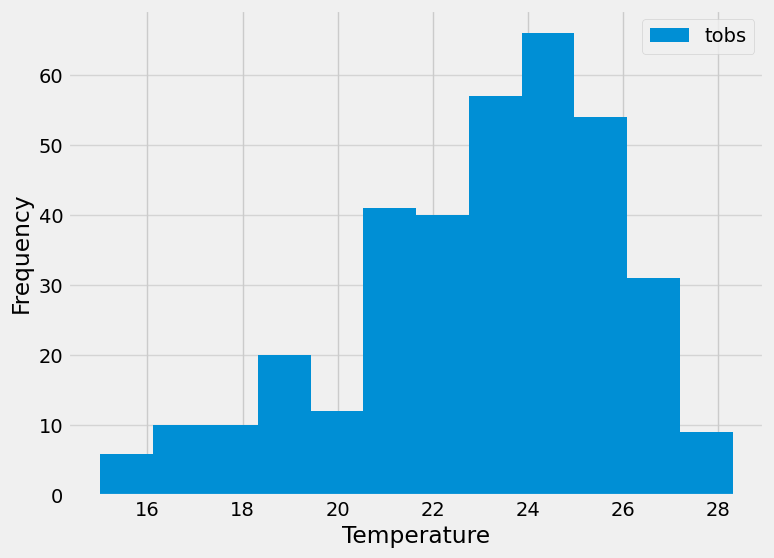

In [73]:
# print text - Text(0.5, 4.183333333333314, 'Temperature'))
print("Text(0.5, 4.183333333333314, 'Temperature')")

# Using the most active station id
most_active_station = session.query(Measurement.station)\
                             .group_by(Measurement.station)\
                             .order_by(func.count(Measurement.station).desc())\
                             .first()[0]

# Calculate the date one year from the last date in the dataset
most_recent_date_str = session.query(func.max(Measurement.date).label('max_date')).filter(Measurement.station == most_active_station).scalar()
most_recent_date = dt.datetime.strptime(most_recent_date_str, '%Y-%m-%d')
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs)\
                          .filter(Measurement.station == most_active_station)\
                          .filter(Measurement.date >= one_year_ago)\
                          .all()

# Save the query results as a Pandas DataFrame with explicit column names
df_temperature = pd.DataFrame(temperature_data, columns=['Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(df_temperature['Temperature'], bins=12, label='tobs')
plt.legend(loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Close Session

In [74]:
# Close Session
session.close()
